In [384]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
cityraw = open(city_data_to_load)
rideraw = open(ride_data_to_load)

citycsv = csv.reader(cityraw)
ridecsv = csv.reader(rideraw)

city = pd.read_csv(cityraw)
ride = pd.read_csv(rideraw)

#print(city.head())
#print(ride.head())
# Combine the data into a single dataset

ride_city = pd.merge(city, ride, on="city")
#city_ride = city.merge(ride, on="city")

# Display the data table for preview
data = ride_city[["city","date","fare","ride_id","type","driver_count"]]
print(data.sort_values(by="date"))
iconic = data

                    city                 date   fare        ride_id      type  \
743             Liumouth  2018-01-01 00:08:16  37.91  5673666505216     Urban   
1678         Colemanland  2018-01-01 00:46:46  47.74  2215912677020  Suburban   
1959           Sotoville  2018-01-01 02:07:24  24.07  7827431948090  Suburban   
780              Royland  2018-01-01 03:46:50   7.57  5815378003370     Urban   
985           West Heidi  2018-01-01 05:23:21  10.75  6571513080673     Urban   
2365         Jessicaport  2018-01-01 09:45:36  43.69  2424875833354     Rural   
2023        South Brenda  2018-01-01 12:32:48  25.56  2613536554411  Suburban   
1554        Williamsview  2018-01-01 14:40:14   5.42  5676167585855     Urban   
1277        Valentineton  2018-01-01 14:42:25  12.31  4757042711529     Urban   
2227  North Richardhaven  2018-01-01 14:52:06  31.15  7188584539017  Suburban   
1198           Pattyland  2018-01-01 17:22:58  42.11  9614950109785     Urban   
1598  Port Samanthamouth  20

## Bubble Plot of Ride Sharing Data

   Average Fare  Total Rides           city
0     24.641667         18.0    Amandaburgh
1     25.332273         22.0    Barajasview
2     36.422500         16.0  Barronchester
3     32.956111         18.0    Bethanyland
4     40.064000         10.0   Bradshawfurt


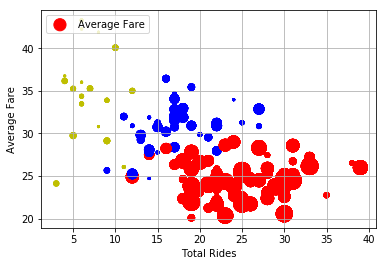

<Figure size 432x288 with 0 Axes>

In [385]:
# Obtain the x and y coordinates for each of the three city types
fares = data.groupby(["city"]).fare.mean() #this kinda thing in pandas drives me crazy
rides = data.groupby(["city"]).fare.count()

#print(fares['Brandonfort'])

farerides = {}

for key, value in fares.iteritems():
    farerides.update({key:[value]})
#print(farerides)
for key, value in rides.iteritems():
    farerides[key].append(value)
#I didnt want to have to use python loops
#print(farerides)
#print(fares.head())
#print(rides.describe())

#print(type(fares))
#fareRide = rides.align(fares)
dffares = pd.DataFrame(fares)
dfrides = pd.DataFrame(rides)
#dffares['fare'].head()
frdf = pd.DataFrame(farerides)
frdf = frdf.T
#frdf.index.name = 'city'
frdf.columns = ['Average Fare', 'Total Rides']
#gooooood night

frdf['city'] = frdf.index # you must be kidding
frdf = frdf.reset_index()
frdf = frdf.drop(['index'], axis=1)
print(frdf.head())
#print(data[['city','type']])
types = pd.merge(frdf, data[['city','type','driver_count']], on='city')
#https://www.youtube.com/watch?v=5PbaRMnRB8w

# Build the scatter plots for each city types
types['type'] = types['type'].map({'Urban':'r','Suburban':'b','Rural':'y'})
plt.scatter(types['Total Rides'], types['Average Fare'], s=types['driver_count']*4, c=types['type'], marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=1, verts=None, edgecolors=None)

# Incorporate the other graph properties
plt.xlabel('Total Rides')
plt.ylabel('Average Fare')
plt.grid(b=None, which='major', axis='both')

# Create a legend
plt.legend(loc='upper left')
plt.show()

# Incorporate a text label regarding circle size

# Save Figure
#file = open('figure.png', 'wb')
x = plt.savefig('figure.png')



In [386]:
# Show plot
plt.show()

## Total Fares by City Type

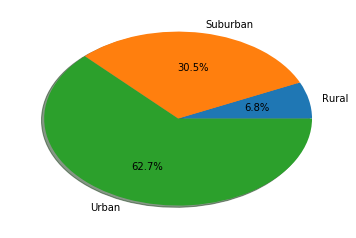

In [387]:
# Calculate Type Percents
pie1 = data.groupby(['type']).fare.sum()
# Build Pie Chart
pie1.index

plt.pie(pie1, explode=None, labels=pie1.index, colors=None, autopct='%1.1f%%', pctdistance=0.6, shadow=True, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False)
# Save Figure

plt.savefig("pie1.png")

In [388]:
# Show Figure
plt.show()

## Total Rides by City Type

([<matplotlib.patches.Wedge at 0x19a56459ef0>,
 [Text(1.085,0.181054,'Rural'),
  Text(0.441865,1.00735,'Suburban'),
  Text(-0.601643,-0.920883,'Urban')],
 [Text(0.591817,0.0987568,'5.3%'),
  Text(0.241017,0.549464,'26.3%'),
  Text(-0.328169,-0.5023,'68.4%')])

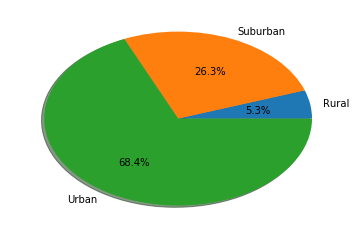

In [389]:
# Calculate Ride Percents

pie1 = data.groupby(['type']).ride_id.count()
pie1.index
plt.pie(pie1, explode=None, labels=pie1.index, colors=None, autopct='%1.1f%%', pctdistance=0.6, shadow=True, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False)


# Build Pie Chart

# Save Figure


In [390]:
# Show Figure
plt.show()

## Total Drivers by City Type

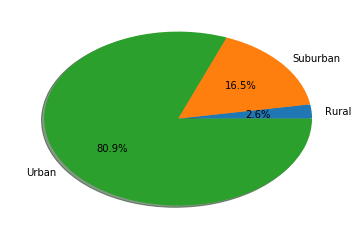

In [412]:
# Calculate Driver Percents
#piex = iconic.groupby(['city','type']).driver_count

whatever = data['city'].unique()
#print(whatever)
whatever2 = pd.DataFrame(whatever)
whatever2.columns = ['city']
#print(whatever2)
p3 = whatever2.merge(data[['type','driver_count','city']], left_on='city', right_on='city', how='left')
#print(p3)
p4 =p3.drop_duplicates()
# Build Pie Charts
    
#print(p4)    
pie3 = p4.groupby(['type']).driver_count.sum()
plt.pie(pie3, explode=None, labels=pie1.index, colors=None, autopct='%1.1f%%', pctdistance=0.6, shadow=True, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False)


# Save Figure
plt.savefig('pie3.png')

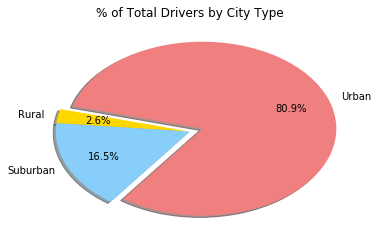

In [6]:
# Show Figure
plt.show()